In [2]:
# Importing the required libraries

import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anann\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Data Analysis

data = pd.read_csv("mbti_1.csv")

# Description of the dataset
print("Dataset Description: \n", data.describe())
print("\n")

# Info about the data
print("Dataset Info: \n", data.info())
print("\n")

# Shape of the data
print("Dimensions of the dataset: ", data.shape)
print("\n")

Dataset Description: 
         type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
Dataset Info: 
 None


Dimensions of the dataset:  (8675, 2)




In [4]:
data

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


Null Values: 

type     0
posts    0
dtype: int64


No. of posts of each mbti personality: 

type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)




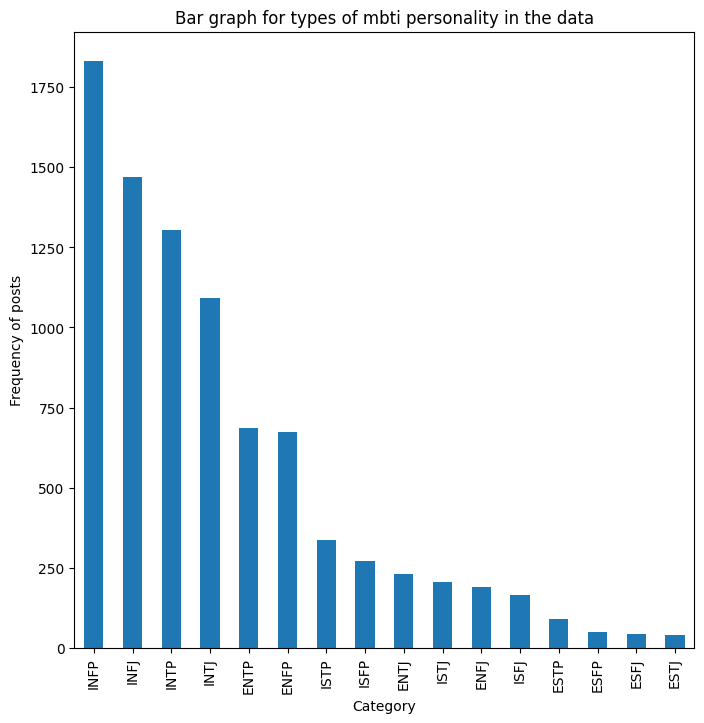

In [5]:
# Check for null values
print("Null Values: \n")
print(data.isnull().sum())

# Plotting frequency of different categories
countCategory = data['type'].value_counts()
print("\n")

print("No. of posts of each mbti personality: \n")
print(countCategory)

# Frequency vs labeled comparative bar graph
print(countCategory.plot(kind='bar', figsize=(8, 8), xlabel='Category', ylabel='Frequency of posts',
                        title='Bar graph for types of mbti personality in the data'))
print("\n")

In [6]:
# Helper function to create a list for type indicators
def helper(ls, ch1, Type, ind):
    i = 0
    for row in Type:
        if row[ind] == ch1:
            ls[i] = 1
        else:
            ls[i] = 0
        i = i + 1
    return ls

# This function takes dataset as input and compares the character of type and then returns 1 for I,N,T,J and 0 for E,S,F,P 
# It adds 4 columns(dimensions) for 4 type indicators(personality traits)
#a person can be either I or E |||ly the rest
def Add_Type_Indicators(data):
    IE = np.zeros(data.shape[0])
    NS = np.zeros(data.shape[0])           
    TF = np.zeros(data.shape[0])
    JP = np.zeros(data.shape[0])
#arrays for different personality types

    Type = list(data["type"])

    IE = helper(IE, 'I', Type, 0)
    NS = helper(NS, 'N', Type, 1)
    TF = helper(TF, 'T', Type, 2)
    JP = helper(JP, 'J', Type, 3)

    data.insert(2, "IE", IE, True)
    data.insert(3, "NS", NS, True)
    data.insert(4, "TF", TF, True)
    data.insert(5, "JP", JP, True)

data_copy = data.copy(deep=True)
Add_Type_Indicators(data_copy)

data_copy

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1.0,1.0,0.0,1.0
1,ENTP,'I'm finding the lack of me in these posts ver...,0.0,1.0,1.0,0.0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1.0,1.0,1.0,0.0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1.0,1.0,1.0,1.0
4,ENTJ,'You're fired.|||That's another silly misconce...,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,1.0,0.0,0.0,0.0
8671,ENFP,'So...if this thread already exists someplace ...,0.0,1.0,0.0,0.0
8672,INTP,'So many questions when i do these things. I ...,1.0,1.0,1.0,0.0
8673,INFP,'I am very conflicted right now when it comes ...,1.0,1.0,0.0,0.0


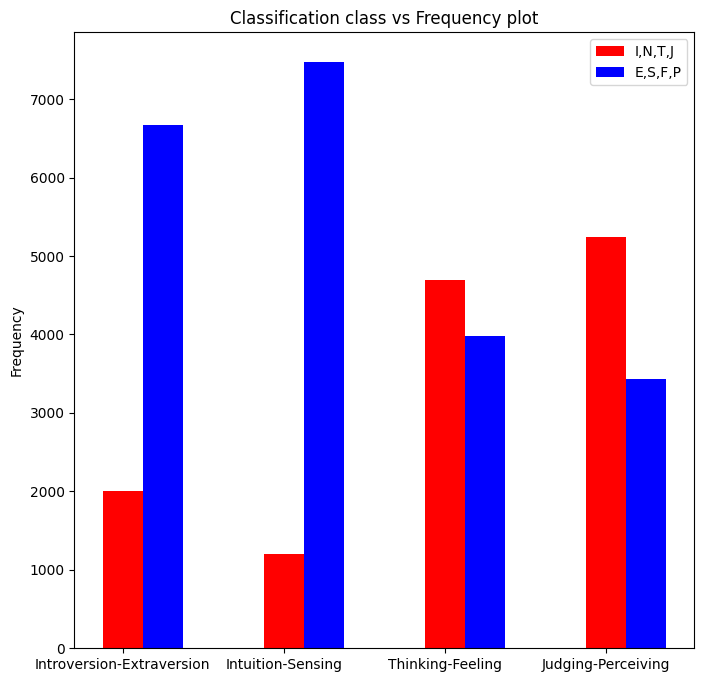

In [7]:
# Plotting Classification class vs Frequency plot for IE, NS, TF, JP

I, N, T, J = data_copy['IE'].value_counts()[0], data_copy['NS'].value_counts()[0], data_copy['TF'].value_counts()[0], data_copy['JP'].value_counts()[0]
E, S, F, P = data_copy['IE'].value_counts()[1], data_copy['NS'].value_counts()[1], data_copy['TF'].value_counts()[1], data_copy['JP'].value_counts()[1]

plt.figure(figsize=(8, 8))

coordinates = np.array(range(0, 4)) * 2
plt.bar(coordinates - 0.25, (I, N, T, J), 0.5, label="I,N,T,J", color='red',
        tick_label=['Introversion-Extraversion', 'Intuition-Sensing', 'Thinking-Feeling', 'Judging-Perceiving'])
plt.bar(coordinates + 0.25, (E, S, F, P), 0.5, label="E,S,F,P", color='blue')

plt.legend()
plt.title('Classification class vs Frequency plot')
plt.ylabel('Frequency')
plt.show()

Correlation Matrix:
           IE        NS        TF        JP
IE  1.000000 -0.045899 -0.069573  0.161939
NS -0.045899  1.000000 -0.080954  0.014922
TF -0.069573 -0.080954  1.000000 -0.004673
JP  0.161939  0.014922 -0.004673  1.000000

HeatMap Visual:

Axes(0.125,0.11;0.62x0.77)


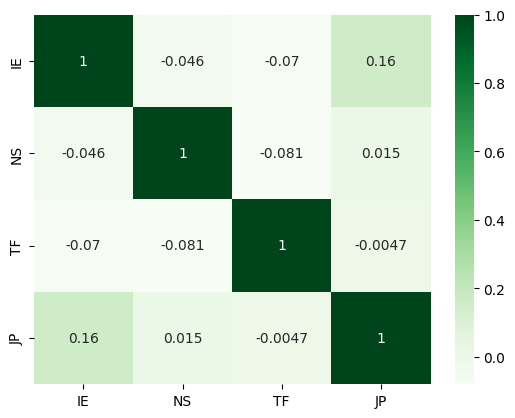

In [8]:
# Correlation matrix and Heatmap Visuals
#looking at the heatmap, if a person has I or E trait then they are likely to have J or P

columns = ['IE', 'NS', 'TF', 'JP']
matrix = data_copy[columns].corr()

print('Correlation Matrix:\n', matrix)
print('\nHeatMap Visual:\n')
print(sns.heatmap(matrix, annot=True, cmap='Greens'))

data_copy_1 = data_copy.copy(deep=True)

data_copy = data_copy_1.copy(deep=True)


In [9]:
# Pre-Processing

# Converting all text/posts to lowercase
data_copy["posts"] = data_copy["posts"].str.lower()

# Remove URL links
for i in range(data_copy.shape[0]):
    post_temp = data_copy.loc[i, 'posts']
    pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')
    post_temp = re.sub(pattern, ' ', post_temp)
    data_copy.loc[i, 'posts'] = post_temp

    pattern2 = re.compile(r'https?://[a-zA-Z0-9./-]*')
    post_temp = data_copy.loc[i, 'posts']
    post_temp = re.sub(pattern2, ' ', post_temp)
    data_copy.loc[i, 'posts'] = post_temp

# Remove special characters and numbers from texts.
for i in range(data_copy.shape[0]):
    post_temp = data_copy.loc[i, 'posts']
    pattern = re.compile('\W+')
    post_temp = re.sub(pattern, ' ', post_temp)
    pattern = re.compile(r'[0-9]')
    post_temp = re.sub(pattern, ' ', post_temp)
    pattern = re.compile(r'[_+]')
    post_temp = re.sub(pattern, ' ', post_temp)
    data_copy.loc[i, 'posts'] = post_temp

# Remove extra spaces from texts.
for i in range(data_copy.shape[0]):
    post_temp = data_copy.loc[i, 'posts']
    pattern = re.compile('\s+')
    post_temp = re.sub(pattern, ' ', post_temp)
    data_copy.loc[i, 'posts'] = post_temp

# Remove stop words. these are the words that are commonly used in communication like 'from' 'the'. this is removed as they dont define a personality
remove_words = stopwords.words("english")
for i in range(data_copy.shape[0]):
    post_temp = data_copy.loc[i, 'posts']
    post_temp = " ".join([w for w in post_temp.split(' ') if w not in remove_words])
    data_copy.loc[i, 'posts'] = post_temp

# Remove mbti personality words from text
mbti_words = ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
for i in range(data_copy.shape[0]):
    post_temp = data_copy.loc[i, 'posts']
    post_temp = " ".join([w for w in post_temp.split(' ') if w not in mbti_words])
    data_copy.loc[i, 'posts'] = post_temp

# Lemmatization (grouping similar words)
lemmatizer = WordNetLemmatizer()
for i in range(data_copy.shape[0]):
    post_temp = data_copy.loc[i, 'posts']
    post_temp = " ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')])
    data_copy.loc[i, 'posts'] = post_temp

In [10]:
# Data before preprocessing
print("Data (post 2) before preprocessing :", data.iloc[2, 1], "\n")

# Data after preprocessing
print("Data (post 2) after preprocessing :", data_copy.iloc[2, 1], "\n")

Data (post 2) before preprocessing : 'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven'

In [11]:
# Finding features using CountVectorizer by converting the posts into a matrix of word count
post_list = []
for i, row in data_copy.iterrows():
    post_list.append(row['posts'])

vector = CountVectorizer(stop_words='english', max_features=1500)        #removes common words, max 1500 words
features = vector.fit_transform(post_list)

# TF-IDF to weigh the importance of words (features) across all posts and select more relevant features
transform = TfidfTransformer()
finalfeatures = transform.fit_transform(features).toarray()

print(finalfeatures.shape)

X_data = finalfeatures
Y_data = data_copy.iloc[:, 2:6]  # Select the relevant columns for Y_data

(8675, 1500)


In [12]:
# Splitting the data into training and testing sets for each dimension
#predicts each category of a person wether I or E etc 
X_train_IE, X_test_IE, Y_train_IE, Y_test_IE = train_test_split(X_data, Y_data['IE'], test_size=0.2, random_state=42)
X_train_NS, X_test_NS, Y_train_NS, Y_test_NS = train_test_split(X_data, Y_data['NS'], test_size=0.2, random_state=42)
X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = train_test_split(X_data, Y_data['TF'], test_size=0.2, random_state=42)
X_train_JP, X_test_JP, Y_train_JP, Y_test_JP = train_test_split(X_data, Y_data['JP'], test_size=0.2, random_state=42)

def predict(model1, model2, model3, model4, X_test_IE, X_test_NS, X_test_TF, X_test_JP):
    # IE prediction
    model1.fit(X_train_IE, Y_train_IE)
    ypredIE = model1.predict(X_test_IE)
    
    # NS prediction
    model2.fit(X_train_NS, Y_train_NS)
    ypredNS = model2.predict(X_test_NS)
    
    # TF prediction
    model3.fit(X_train_TF, Y_train_TF)
    ypredTF = model3.predict(X_test_TF)
    
    # JP prediction
    model4.fit(X_train_JP, Y_train_JP)
    ypredJP = model4.predict(X_test_JP)

    return ypredIE, ypredNS, ypredTF, ypredJP


In [13]:
# Function to print Classification Report of the given model
def print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP):
    # Classification Report for Introversion(I) / Extroversion(E)
    print("Classification Report for Introversion(I) / Extroversion(E): \n ")
    print(classification_report(Y_test_IE, ypredIE))
    accuracyIE = accuracy_score(Y_test_IE, ypredIE)
    print("Accuracy for Introversion(I) / Extroversion(E): ", accuracyIE, "\n")
    print("\n")

    # Classification Report for Intuition(N) / Sensing(S)
    print("Classification Report for Intuition(N) / Sensing(S): \n ")
    print(classification_report(Y_test_NS, ypredNS))
    accuracyNS = accuracy_score(Y_test_NS, ypredNS)
    print("Accuracy for Intuition(N) / Sensing(S): ", accuracyNS, "\n")
    print("\n")

    # Classification Report for Thinking(T) / Feeling(F)
    print("Classification Report for Thinking(T) / Feeling(F): \n ")
    print(classification_report(Y_test_TF, ypredTF))
    accuracyTF = accuracy_score(Y_test_TF, ypredTF)
    print("Accuracy for Thinking(T) / Feeling(F): ", accuracyTF, "\n")
    print("\n")

    # Classification Report for Judging(J) / Perceiving(P)
    print("Classification Report for Judging(J) / Perceiving(P): \n ")
    print(classification_report(Y_test_JP, ypredJP))
    accuracyJP = accuracy_score(Y_test_JP, ypredJP)
    print("Accuracy for Judging(J) / Perceiving(P): ", accuracyJP, "\n")
    print("\n")

In [14]:
# Function to print Confusion matrix for the given model
def print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP):
    # Confusion matrix for Introversion(I) / Extroversion(E):
    plt.figure()
    cm = metrics.confusion_matrix(Y_test_IE, ypredIE)
    plt.figure(figsize=(9, 9))
    sns.heatmap(cm, annot=True, cmap='Blues_r', fmt='d')  # Use fmt='d' to display integers
    plt.ylabel('Y_test_IE')
    plt.xlabel('ypredIE')
    plt.title("Confusion matrix for Introversion(I) / Extroversion(E): ", size=17)
    plt.show()

    # Confusion matrix for Intuition(N) / Sensing(S):
    plt.figure()
    cm = metrics.confusion_matrix(Y_test_NS, ypredNS)
    plt.figure(figsize=(9, 9))
    sns.heatmap(cm, annot=True, cmap='Greens_r', fmt='d')  # Use fmt='d' to display integers
    plt.ylabel('Y_test_NS')
    plt.xlabel('ypredNS')
    plt.title("Confusion matrix for Intuition(N) / Sensing(S): ", size=17)
    plt.show()

    # Confusion matrix for Judging(J) / Perceiving(P):
    plt.figure()
    cm = metrics.confusion_matrix(Y_test_TF, ypredTF)
    plt.figure(figsize=(9, 9))
    sns.heatmap(cm, annot=True, cmap='Reds_r', fmt='d')  # Use fmt='d' to display integers
    plt.ylabel('Y_test_TF')
    plt.xlabel('ypredTF')
    plt.title("Confusion matrix for Thinking(T) / Feeling(F): ", size=17)
    plt.show()

    # Confusion matrix for Judging(J) / Perceiving(P):
    plt.figure()
    cm = metrics.confusion_matrix(Y_test_JP, ypredJP)
    plt.figure(figsize=(9, 9))
    sns.heatmap(cm, annot=True, cmap='Purples_r', fmt='d')  # Use fmt='d' to display integers
    plt.ylabel('Y_test_JP')
    plt.xlabel('ypredJP')
    plt.title("Confusion matrix for Judging(J) / Perceiving(P): ", size=17)
    plt.show()


In [15]:
# Function to get GridSearchCV best parameters for each model
#it decides which out of ridge and lasso should be applied 
def get_best_params(model, param_grid, X_train, Y_train):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
    grid_result = grid.fit(X_train, Y_train)
    print("Best Score: ", grid_result.best_score_)
    print("Best Parameters: ", grid_result.best_params_)
    return grid_result

# Function to get models with best parameters
def get_best_models(X_train_IE, X_train_NS, X_train_TF, X_train_JP, Y_train_IE, Y_train_NS, Y_train_TF, Y_train_JP):
    # Logistic Regression model with GridSearchCV best parameters
    lr = LogisticRegression(solver='liblinear')
    param_grid_lr = {
        'penalty': ['l1', 'l2'],                 #L1 regularization (Lasso), L2 regularization (Ridge).
        'C': [0.001, 0.01, 0.1, 1, 10, 100]      #inverse of regularization strength.
    }
    grid_result_lr_IE = get_best_params(lr, param_grid_lr, X_train_IE, Y_train_IE)
    grid_result_lr_NS = get_best_params(lr, param_grid_lr, X_train_NS, Y_train_NS)
    grid_result_lr_TF = get_best_params(lr, param_grid_lr, X_train_TF, Y_train_TF)
    grid_result_lr_JP = get_best_params(lr, param_grid_lr, X_train_JP, Y_train_JP)

    # Model with best parameters for each dimension
    best_lr_IE = LogisticRegression(C=grid_result_lr_IE.best_params_['C'],
                                   penalty=grid_result_lr_IE.best_params_['penalty'], solver='liblinear')
    best_lr_NS = LogisticRegression(C=grid_result_lr_NS.best_params_['C'],
                                   penalty=grid_result_lr_NS.best_params_['penalty'], solver='liblinear')
    best_lr_TF = LogisticRegression(C=grid_result_lr_TF.best_params_['C'],
                                   penalty=grid_result_lr_TF.best_params_['penalty'], solver='liblinear')
    best_lr_JP = LogisticRegression(C=grid_result_lr_JP.best_params_['C'],
                                   penalty=grid_result_lr_JP.best_params_['penalty'], solver='liblinear')

    return best_lr_IE, best_lr_NS, best_lr_TF, best_lr_JP


Best Score:  0.8097982708933718
Best Parameters:  {'C': 1, 'penalty': 'l1'}
Best Score:  0.8785302593659943
Best Parameters:  {'C': 1, 'penalty': 'l1'}
Best Score:  0.8080691642651298
Best Parameters:  {'C': 1, 'penalty': 'l2'}
Best Score:  0.7302593659942362
Best Parameters:  {'C': 1, 'penalty': 'l1'}
Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.73      0.36      0.48       382
         1.0       0.84      0.96      0.90      1353

    accuracy                           0.83      1735
   macro avg       0.78      0.66      0.69      1735
weighted avg       0.82      0.83      0.81      1735

Accuracy for Introversion(I) / Extroversion(E):  0.8293948126801153 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.63      0.12      0.20       246
         1.0       0.87      0.99      0.93      1489

    accuracy 

<Figure size 640x480 with 0 Axes>

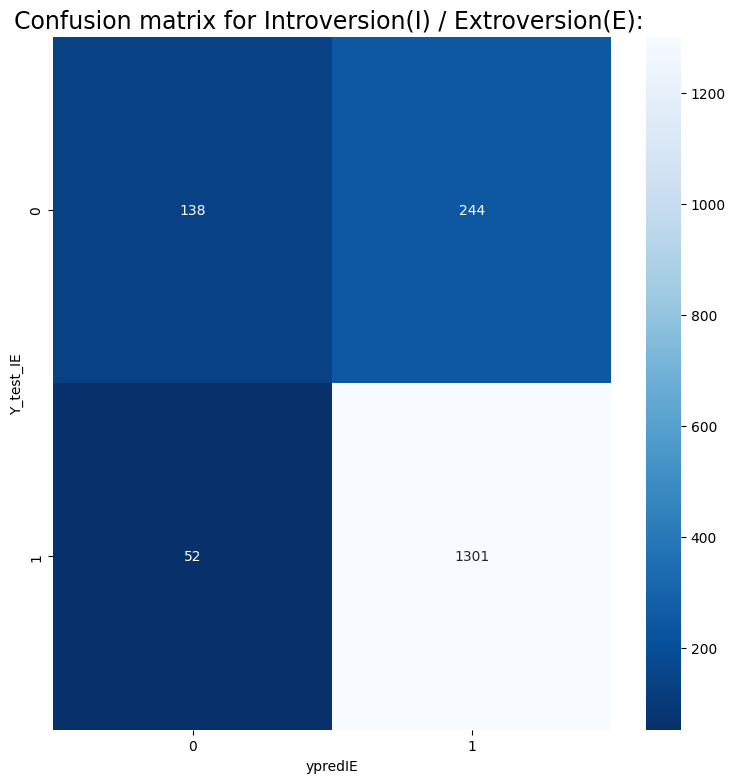

<Figure size 640x480 with 0 Axes>

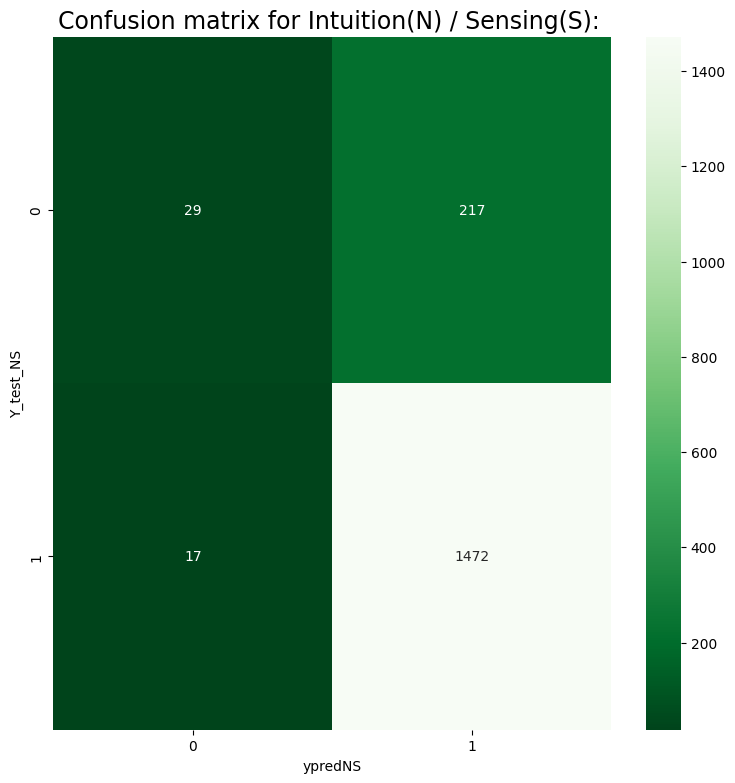

<Figure size 640x480 with 0 Axes>

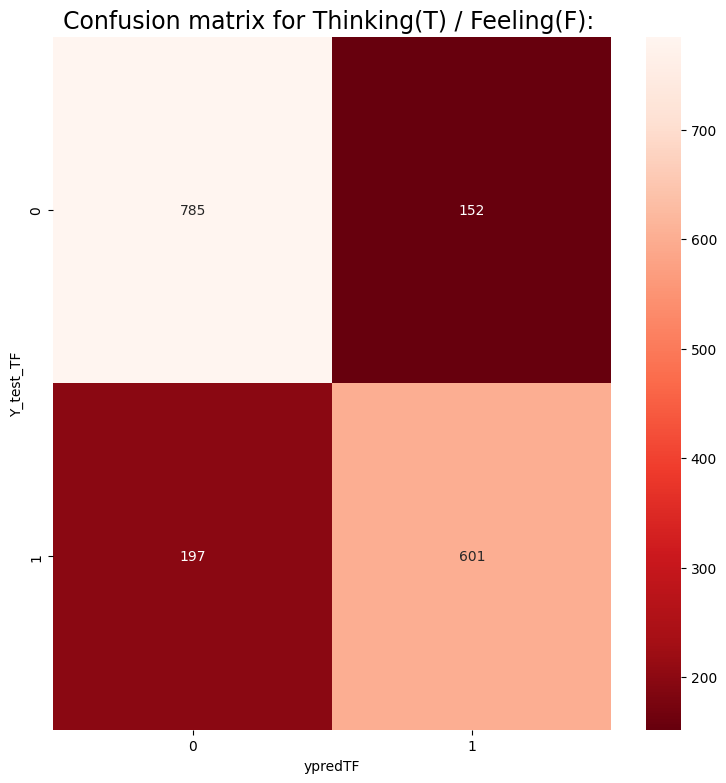

<Figure size 640x480 with 0 Axes>

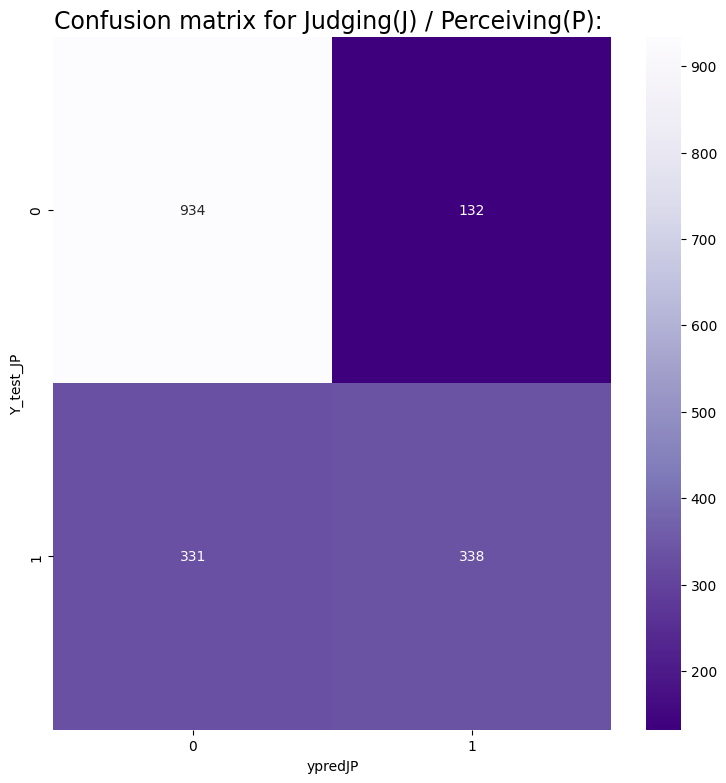

In [16]:
# Splitting the data into training and testing sets for each dimension
X_train_IE, X_test_IE, Y_train_IE, Y_test_IE = train_test_split(X_data, Y_data['IE'], test_size=0.2, random_state=42)
X_train_NS, X_test_NS, Y_train_NS, Y_test_NS = train_test_split(X_data, Y_data['NS'], test_size=0.2, random_state=42)
X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = train_test_split(X_data, Y_data['TF'], test_size=0.2, random_state=42)
X_train_JP, X_test_JP, Y_train_JP, Y_test_JP = train_test_split(X_data, Y_data['JP'], test_size=0.2, random_state=42)

# Getting the best models
best_lr_IE, best_lr_NS, best_lr_TF, best_lr_JP = get_best_models(
    X_train_IE, X_train_NS, X_train_TF, X_train_JP, Y_train_IE, Y_train_NS, Y_train_TF, Y_train_JP
)

# Predicting and evaluating the models
ypredIE, ypredNS, ypredTF, ypredJP = predict(
    best_lr_IE, best_lr_NS, best_lr_TF, best_lr_JP,
    X_test_IE, X_test_NS, X_test_TF, X_test_JP
)

# Print Classification Reports
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

# Print Confusion Matrices
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)
